In [0]:
import numpy as np
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense,Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import pickle#to store the data permanently
import pandas as pd
import random
import cv2



In [0]:
#this is for getting the dataset from repo
!git clone https://njnitesh@bitbucket.org/jadslim/german-traffic-signs.git

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [0]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [0]:
import numpy as np
np.random.seed(0)

In [0]:
with open("german-traffic-signs/train.p","rb") as f:
  train_data=pickle.load(f)
with open("german-traffic-signs/valid.p","rb") as f:
  val_data=pickle.load(f)
with open("german-traffic-signs/test.p","rb")as f:
  test_data=pickle.load(f)

In [0]:
train_data["features"].shape
type(train_data)

dict

In [0]:
x_train,y_train=train_data["features"],train_data["labels"]
x_val,y_val=val_data["features"],val_data["labels"]
x_test,y_test=test_data["features"],val_data["labels"]

In [0]:
y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [0]:
data=pd.read_csv("german-traffic-signs/signnames.csv")

In [0]:
data

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [0]:
y_train[0]

41

In [0]:
y_train.shape

(34799,)

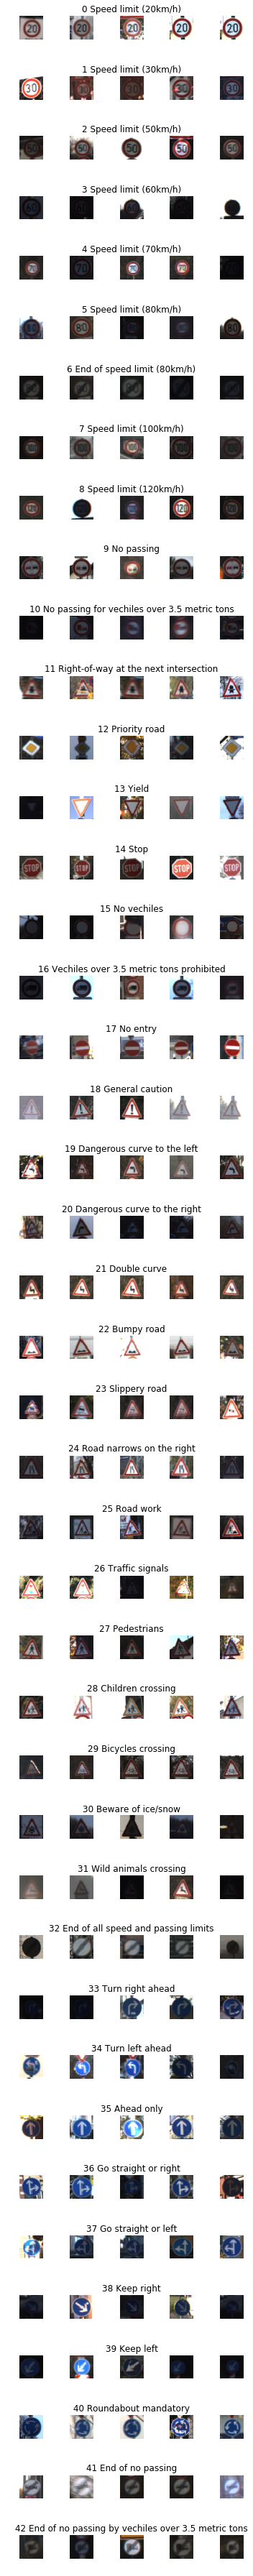

In [0]:
ncol=5
nrows=43
fig,axis=plt.subplots(nrows=43,ncols=ncol,figsize=(5,50))
num_sample=[]
fig.tight_layout()
for i in range(ncol):
  for j,names in data.iterrows():
    x_sel=x_train[y_train==j]
    axis[j][i].imshow(x_sel[random.randint(0,len(x_sel)-1),:,:],cmap="gray")
    axis[j][i].axis("off")
#     print(j)
    if i==2:
      axis[j][i].set_title(str(j)+" "+names["SignName"])
      num_sample.append(len(x_sel))

In [0]:
print(num_sample)

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0.5, 1.0, 'no of images per classes')

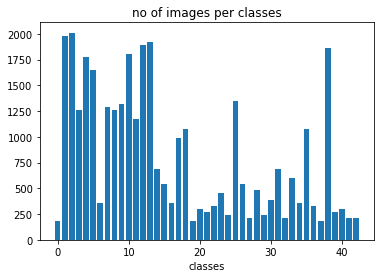

In [0]:

plt.bar(range(nrows),num_sample)
plt.xlabel("classes")
plt.title("no of images per classes")

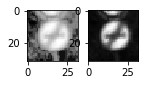

In [0]:
gray=cv2.cvtColor(x_train[1], cv2.COLOR_RGB2GRAY)
equalized=cv2.equalizeHist(gray)
fig,axis=plt.subplots(ncols=2, nrows=1, figsize=(2,1))
axis[0].imshow(equalized, cmap=plt.get_cmap("gray"))
axis[1].imshow(gray, cmap=plt.get_cmap("gray"))

In [0]:
def pre_pro(image):
    gray= cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    equl=cv2.equalizeHist(gray)
    
    return equl/255
    

In [0]:
g=list(map(pre_pro,x_train))
e=list(map(pre_pro,x_test))
d=list(map(pre_pro,x_val))

In [0]:
nx_train=np.array(g)
nx_train=nx_train.reshape(x_train.shape[0],32,32,1)
nx_test=np.array(e)
nx_test=nx_test.reshape(x_test.shape[0],32,32,1)
nx_val=np.array(d)
nx_val=nx_val.reshape(x_val.shape[0],32,32,1)

In [0]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
y_val=to_categorical(y_val)

In [0]:
def lenet_model():
    model=Sequential()
    model.add(Conv2D(30, (5,5), input_shape=(32,32,1), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15, (3,3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(500, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dropout(0.8))
    model.add(Dense(nrows, activation="softmax"))
    model.compile(Adam(lr=0.001), loss="categorical_crossentropy", metrics=["accuracy"] )
    return model  

In [0]:
m=lenet_model()
print(m.summary())
history=m.fit(nx_train, y_train, epochs=20, validation_data=(nx_val, y_val), shuffle=1, verbose=1, batch_size=400)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 30)        780       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 15)        4065      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 540)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               270500    
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)               0         
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:449: UserWarning: The handle 's' has a label of '_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http:/

Text(0.5, 0, 'epoch')

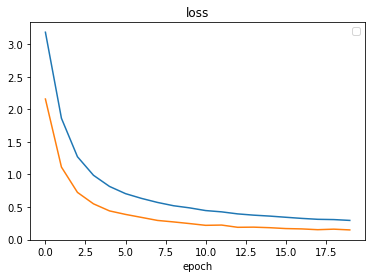

In [0]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend("loss","val_loss")
plt.title("loss")
plt.xlabel("epoch")



In [0]:
import requests
from PIL import Image
import io

#url1="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSr1o-RziZs3PGP456u1Ph8RpF1Ol9P3cHKIun-Y960DSwlGAYE0w"
#url2="https://images-na.ssl-images-amazon.com/images/I/71I2XltRVCL._SX425_.jpg"
#url3="https://media.istockphoto.com/vectors/turn-right-ahead-german-road-sign-blue-vector-id467030179?k=6&m=467030179&s=612x612&w=0&h=1JW9bnaEXh6IgZ-IE2bhqq3-r4aeprCFnshBwcYxRj8="
url4="https://images.homedepot-static.com/productImages/a4e315b5-e2b7-4fd9-94a0-c7d51408285d/svn/brady-stock-signs-94143-64_1000.jpg"
img=Image.open(io.BytesIO(requests.get(url4,stream=True).content))

In [0]:
import cv2 as cv
data=cv.resize(np.array(img,dtype="uint8"),(32,32))
data=cv.cvtColor(data,cv.COLOR_RGB2GRAY)

In [0]:
data.shape

(32, 32)

In [0]:
m.predict_classes(data.reshape(1,32,32,1))

array([14])